## Observations and Insights 

In [470]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [152]:
# Checking the number of mice.
combined_data_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [153]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_and_timepoint_duplicates = combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'])]
mice_and_timepoint_duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [154]:
# Optional: Get all the data for the duplicate mouse ID. 

mice_duplicates = combined_data_df[combined_data_df.duplicated(['Mouse ID'])]
mice_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [155]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_df_clean = combined_data_df.drop_duplicates(subset=['Mouse ID'])
combined_data_df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [156]:
combined_data_df_clean_renamed = combined_data_df_clean.rename(columns={"Age_months": "Age", "Weight (g)": "Weight", "Tumor Volume (mm3)": "Tumor Volume"})            
combined_data_df_clean_renamed.head()

,Mouse ID,Drug Regimen,Sex,Age,Weight,Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [157]:
# Checking the number of mice in the clean DataFrame.
print(combined_data_df_clean_renamed["Mouse ID"].count())

249


## Summary Statistics

In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor_volume = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
dev_tumor_volume = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_one_df = pd.DataFrame({"Mean": mean_tumor_volume, "Median": median_tumor_volume, "Variance": var_tumor_volume, 
                               "Standard Deviation": dev_tumor_volume, "Sem": sem_tumor_volume})
summary_one_df



,Mean,Median,Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [159]:
summary_one_df[["Sem"]]

,Sem
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


In [265]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

single_line_df = combined_data_df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
single_line_df 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements Taken')

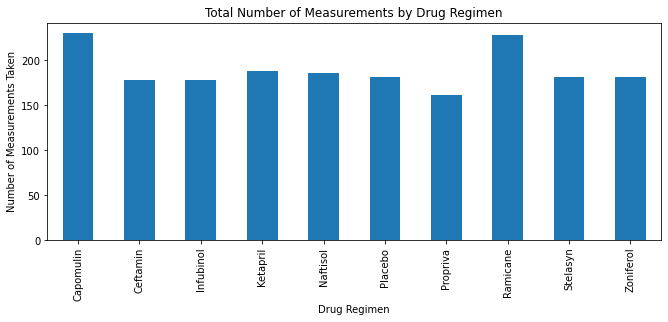

In [266]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_groups = combined_data_df.groupby('Drug Regimen')
measurement_count = regimen_groups['Mouse ID'].count()
regimen_count_bar = measurement_count.plot(kind="bar", figsize=(11,4), title="Total Number of Measurements by Drug Regimen")
regimen_count_bar.set_xlabel("Drug Regimen")
regimen_count_bar.set_ylabel("Number of Measurements Taken")

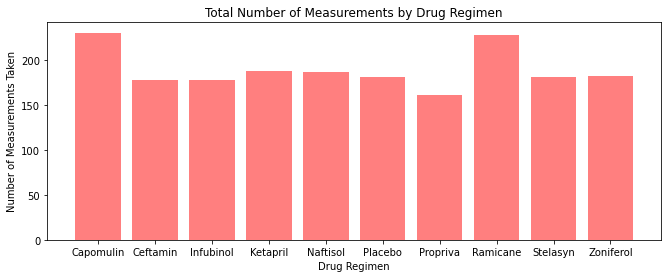

In [298]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_list = combined_data_df['Drug Regimen'].values
x_axis_values = np.unique(regimen_list)
measurement_list = combined_data_df.groupby(["Drug Regimen"])["Mouse ID"]
y_axis_values = measurement_list.count()
plt.figure(figsize=(11,4))
plt.bar(x_axis_values, y_axis_values, color='r', alpha=0.5, align="center")
plt.title("Total Number of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.show()  

In [357]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_groups_df = pd.DataFrame(combined_data_df.groupby(['Sex']).count())
sex_groups_df.head()

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


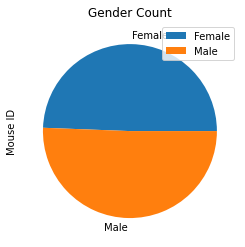

In [365]:
sex_pie_one = sex_groups_df.plot(kind="pie", y='Mouse ID', title=("Gender Count"))

In [372]:
sex_count = combined_data_df['Sex'].value_counts()
sex_count

Male      958
Female    935
Name: Sex, dtype: int64

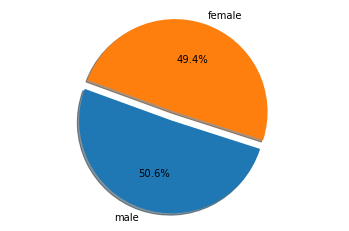

In [368]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Pie chart, where the slices will be ordered and plotted counter-clockwise:


labels = 'male', 'female'
sex_count = [958, 935]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sex_count, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=160)
ax1.axis('equal') 

plt.show()

## Quartiles, Outliers and Boxplots

In [410]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max = combined_data_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_max_df = pd.DataFrame(timepoint_max)
merged_timepoint_df = pd.merge(timepoint_max_df, combined_data_df, how='outer', on=('Mouse ID','Timepoint'))
merged_timepoint_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [448]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
cap_list = []
ram_list = []
infu_list = []
ceft_list = []
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for index, row in combined_data_df.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        cap_list.append(row["Tumor Volume (mm3)"])
    if row['Drug Regimen'] == 'Ramicane':
        ram_list.append(row["Tumor Volume (mm3)"])
    if row['Drug Regimen'] == 'Infubinol':
        infu_list.append(row["Tumor Volume (mm3)"])
    if row['Drug Regimen'] == 'Ceftamin':
        ceft_list.append(row["Tumor Volume (mm3)"])
    
cap_iqr = st.iqr(cap_list)
ram_iqr = st.iqr(ram_list)
infu_iqr = st.iqr(infu_list)
ceft_iqr = st.iqr(ceft_list)

cap_outliers = [x for x in cap_list if x < np.quantile(cap_list,.25) - 1.5 * cap_iqr or 
                        x > np.quantile(cap_list,.75) + 1.5 * cap_iqr]
ram_outliers = [x for x in ram_list if x < np.quantile(ram_list,.25) - 1.5 * ram_iqr or 
                        x > np.quantile(ram_list,.75) + 1.5 * ram_iqr]
infu_outliers = [x for x in infu_list if x < np.quantile(infu_list,.25) - 1.5 * infu_iqr or 
                        x > np.quantile(infu_list,.75) + 1.5 * infu_iqr]
ceft_outliers = [x for x in ceft_list if x < np.quantile(ceft_list,.25) - 1.5 * ceft_iqr or 
                        x > np.quantile(ceft_list,.75) + 1.5 * ceft_iqr]

print(cap_outliers)
print(ram_outliers)
print(infu_outliers)
print(ceft_outliers)

[25.47214326, 23.34359787]
[22.05012627]
[]
[]


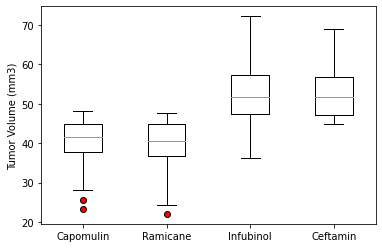

In [447]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([cap_list, ram_list, infu_list, ceft_list], flierprops=dict(marker='o',markerfacecolor='r'));
plt.xticks([1,2,3,4],["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]);
plt.ylabel("Tumor Volume (mm3)");

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

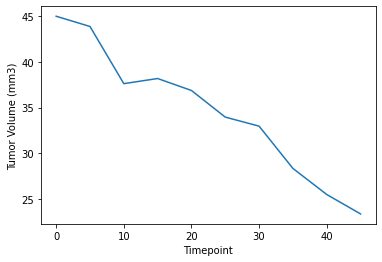

In [464]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = combined_data_df[(combined_data_df['Drug Regimen']=='Capomulin') & (combined_data_df['Mouse ID']=='s185')]
plt.plot(cap_df["Timepoint"],cap_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

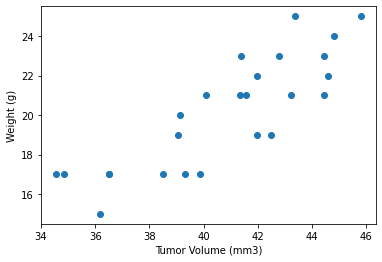

In [469]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = combined_data_df[combined_data_df['Drug Regimen']=='Capomulin']
plt.scatter(cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean(), cap_df.groupby("Mouse ID")["Weight (g)"].mean())
plt.xlabel("Tumor Volume (mm3)");
plt.ylabel("Weight (g)");

## Correlation and Regression

In [483]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().to_numpy().reshape(-1,1)
y = cap_df.groupby("Mouse ID")["Weight (g)"].mean().tolist()
reg = LinearRegression().fit(x, y)
r2 = reg.score(x, y)
print("Correlation Coefficient = " + str(np.sqrt(r2)))

Correlation Coefficient = 0.8419363424694718
